# SVM


1. (0.5 баллов) Сгенерируйте три случайные двумерные выборки для бинарной классификации (хотя бы по 400 точек в каждой):

- с линейно разделимыми классами;

- с хорошо разделимыми классами, но не линейно разделимыми;

- с плохо разделимыми классами.

Визуализируйте полученные выборки на плоскости.

Для генерации случайной выборки можно использовать функции из модуля sklearn.datasets.

2. (1.5 балла) Обучите на сгенерированных ранее двумерных выборках ядровой SVM с использованием следующих типов ядер (для различных значений гиперпараметра ):

- линейное;
- полиномиальное:  (для различных значений gamma, degree );
- гауссовское:  (для различных значений gamma).

Визуализируйте разделяющую поверхность и разделяющую полосу:
- для модели с линейным ядром для различных значений параметров;
- для моделей, использующих полиномиальное и гауссовское ядро, соответствующих недообучению, нормальному поведению и переобучению.

In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs

# Линейно разделимые классы

In [29]:
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=1.0, center_box=(- 10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

In [31]:
X.shape, y.shape

((1000, 2), (1000,))

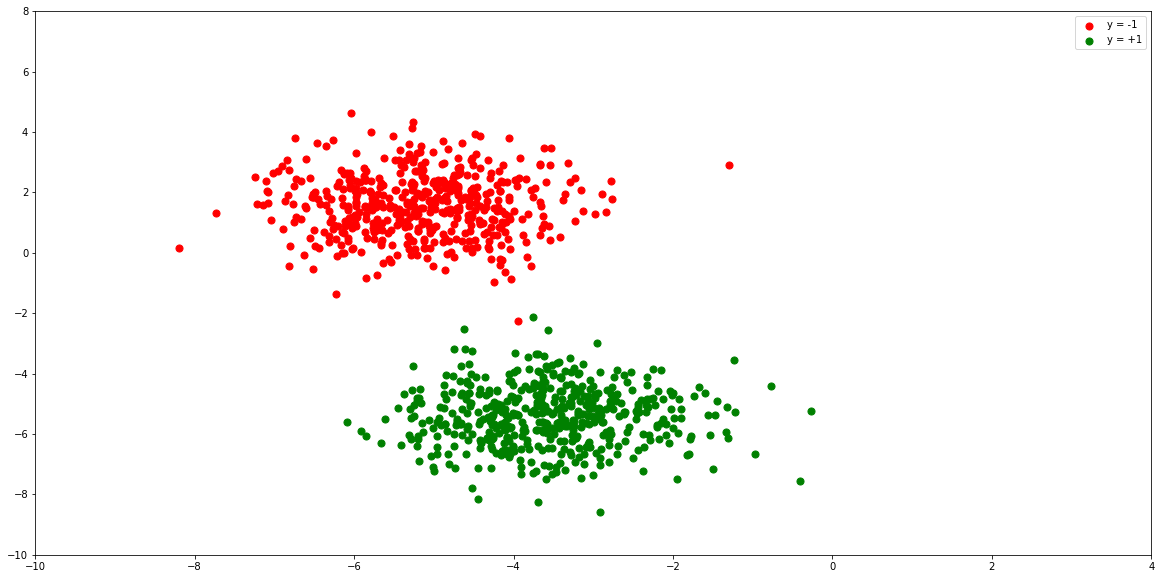

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,10))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', s=50, label='y = -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='green', s=50, label='y = +1')

axes = plt.gca()
axes.set_xlim([-10, 4])
axes.set_ylim([-10, 8])
plt.legend(loc=0)
plt.show()

Получили два разделимых между собой класса. Прямая проводится хорошо, есть один красный объект - кандидат в опорные нарушители

## Линейное ядро

Посмотрим линейное ядро.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]

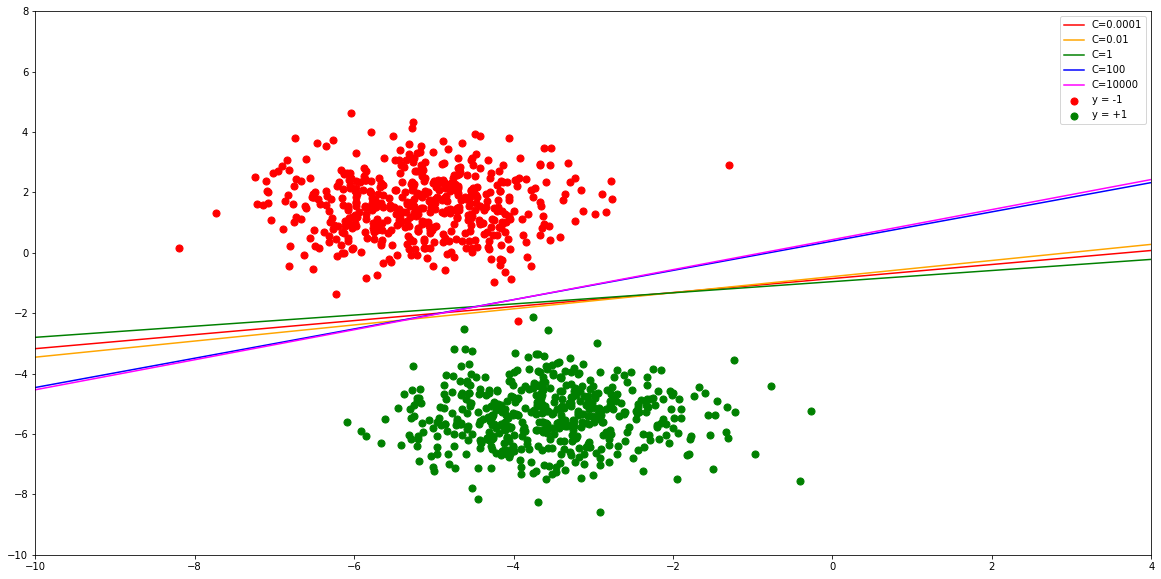

In [49]:
from sklearn.svm import SVC
plt.figure(figsize=(20,10))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='red', s=50, label='y = -1')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='green', s=50, label='y = +1')
x_arr = np.linspace(-10, 15, 3000)
colors = ['red', 'orange', 'green', 'blue', 'magenta']

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    SVM_classifier = SVC(C=C, kernel='linear')
    SVM_classifier.fit(X, y)
    w_1 = SVM_classifier.coef_[0][0]
    w_2 = SVM_classifier.coef_[0][1]
    w_0 = SVM_classifier.intercept_[0]
    plt.plot(x_arr, -(w_0 + w_1 * x_arr) / w_2, color=colors[i], label='C='+str(C))

axes = plt.gca()
axes.set_xlim([-10, 4])
axes.set_ylim([-10, 8])
plt.legend(loc=0)
plt.show()

## Полиноминальное ядро 


Теперь посмотрим полиноминальное ядро.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- degree in [3, 4, 5]
- default gamma = 'scale'

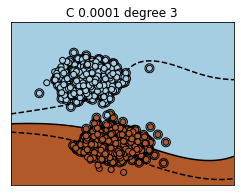

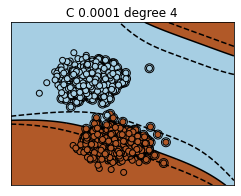

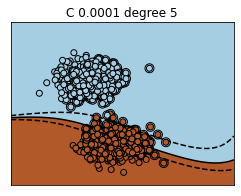

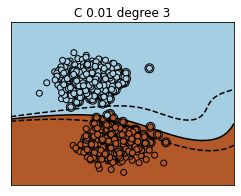

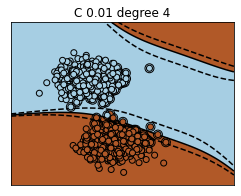

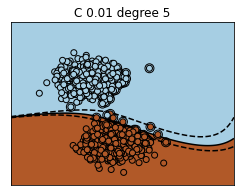

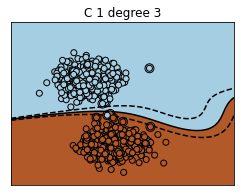

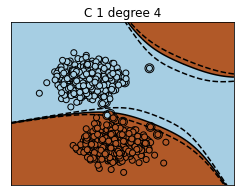

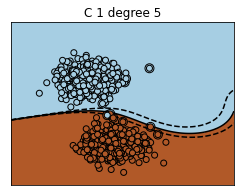

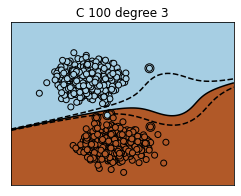

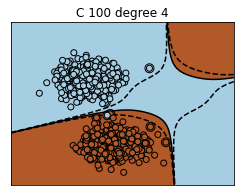

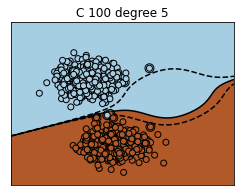

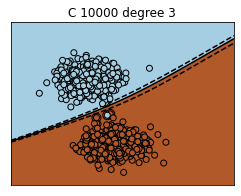

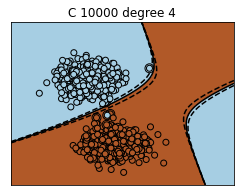

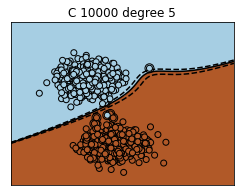

In [63]:
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    for j in [3, 4, 5]:
        clf = svm.SVC(C=C, kernel='poly', degree=j)
        clf.fit(X, y)
    
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

        plt.axis('tight')
        x_min = -10
        x_max = 4
        y_min = -10
        y_max = 8

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        plt.title("C " + str(C) + " degree " + str(j))
        fignum = fignum + 1


plt.show()



При низких С= 0.0001, 0.01 похоже на недообучение, поскольку слишком много объектов из нижнего класса попадает в опорные нарушители

С повышением С разделяющая кривая становится лучше, правда 100% точного прогноза мы достичь не можем. Полоса (margin) довольно узкая

Теперь сделаем все то же самое, только для параментра gamma = 'auto'.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- degree in [3, 4, 5]
- gamma = 'auto'


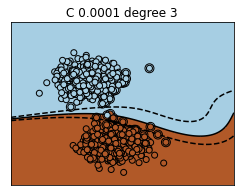

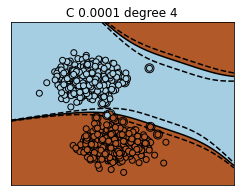

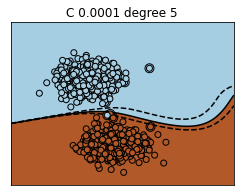

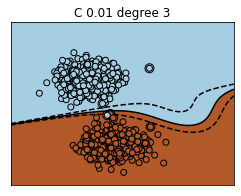

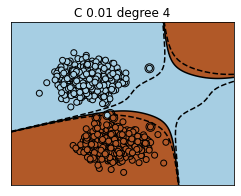

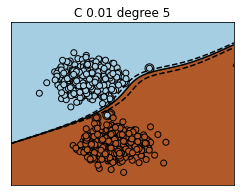

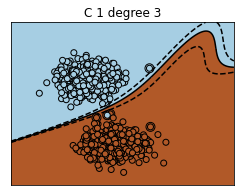

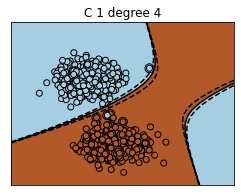

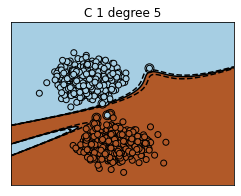

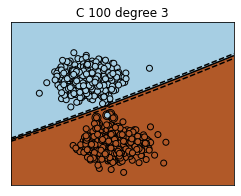

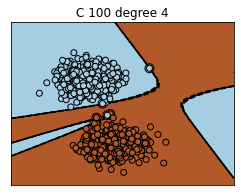

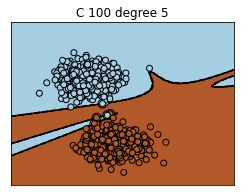

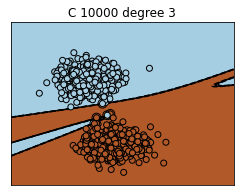

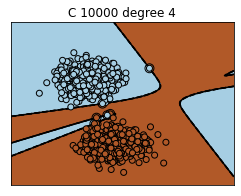

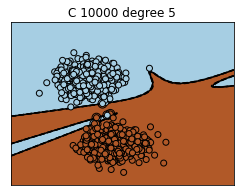

In [67]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    for j in [3, 4, 5]:
        clf = svm.SVC(C=C, kernel='poly', gamma= 'auto', degree=j)
        clf.fit(X, y)
    
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

        plt.axis('tight')
        x_min = -10
        x_max = 4
        y_min = -10
        y_max = 8

        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        plt.title("C " + str(C) + " degree " + str(j))
        fignum = fignum + 1


plt.show()

С повышением С мы видим, как модель начинает переобучаться, так как она начинает пытаться поймать тот один объект, который является опорным нарушителем 

Лучше всего модель разделяет классы при малых С

## Гауссовское ядро

Возьмем гауссовское ядро. 

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- default gamma = 'scale'

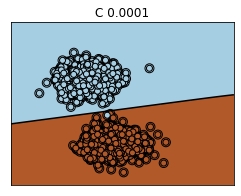

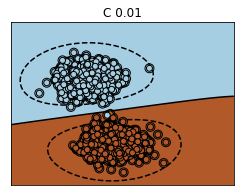

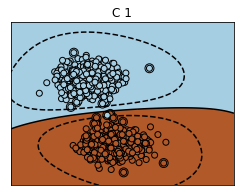

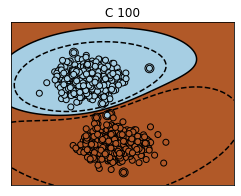

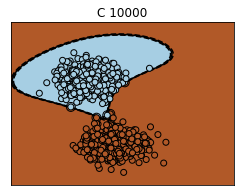

In [95]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    
    clf = svm.SVC(C=C, kernel='rbf')
    clf.fit(X, y)

    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -10
    x_max = 4
    y_min = -10
    y_max = 8

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title("C " + str(C) )
    fignum = fignum + 1


plt.show()

Классы хорошо разделяются, лучше всего при малых С. При больших С становится похоже на переобучение, так как один класс - голубой- явно начинает выделяться по периметру

Теперь сделаем все то же самое, только для параметра gamma = 'auto'.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- gamma = 'auto'

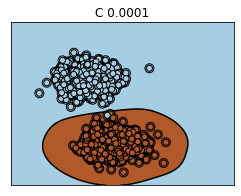

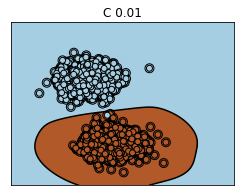

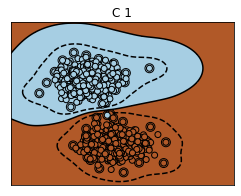

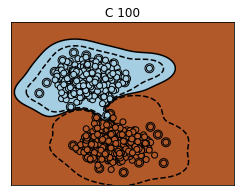

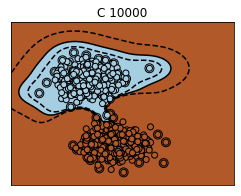

In [96]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    
    clf = svm.SVC(C=C, kernel='rbf', gamma= 'auto')
    clf.fit(X, y)

    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -10
    x_max = 4
    y_min = -10
    y_max = 8

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title("C " + str(C))
    fignum = fignum + 1


plt.show()

Классы также хорошо разделяются, как и в прошлом случае. 

При больших С становится опять похоже на переобучение. 

В данном случае ширина разделяющих полос (margin) шире, чем в предыдущем

# Хорошо разделимые, но не линейно разделимые классы

Теперь сгенерим два класса, которые являются хорошо разделимыми классами, но не линейно разделимыми.

Для этого воспользуемся make_circles и сделаем один класс находящимся внутри другого, оба будут представлены в виде "кругов"

In [297]:
from sklearn.datasets import make_circles
XX, yy = make_circles(n_samples=1000, shuffle=True, noise=0.05, random_state=0, factor=0.8)

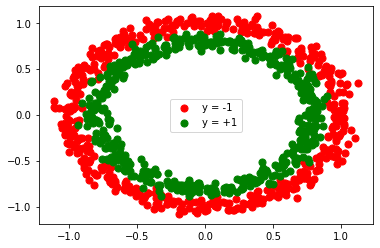

In [298]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(XX[yy == 0][:, 0], XX[yy == 0][:, 1], c='red', s=50, label='y = -1')
plt.scatter(XX[yy == 1][:, 0], XX[yy == 1][:, 1], c='green', s=50, label='y = +1')

plt.legend(loc=0)
plt.show()

Для этих классов смысла проверять линейное ядро нет, мы не разделим их прямой. Поэтому будем смотреть только полиномиальное и гауссовское

## Полиномиальное ядро

Посмотрим полиноминальное ядро.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- degree in [3, 4, 5]
- default gamma = 'scale'

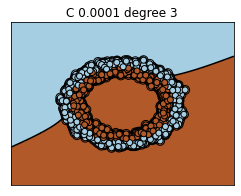

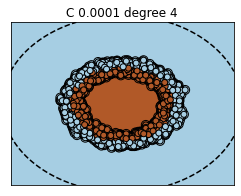

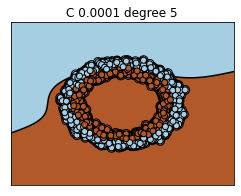

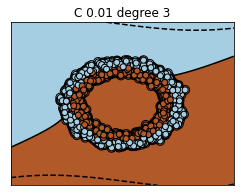

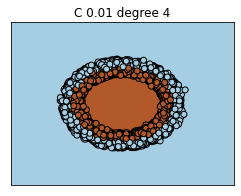

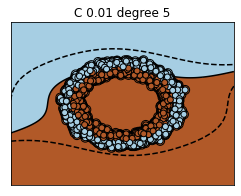

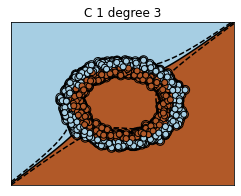

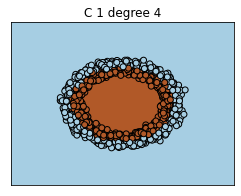

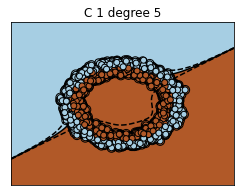

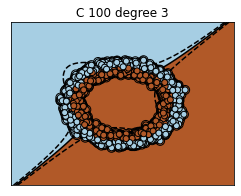

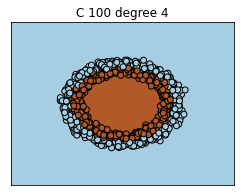

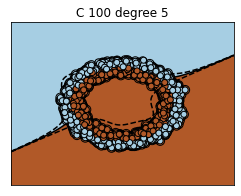

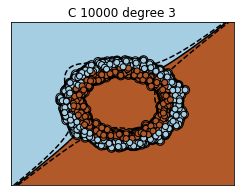

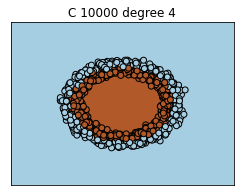

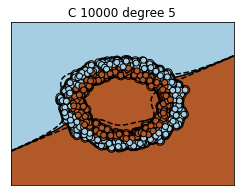

In [91]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    for j in [3, 4, 5]:
        clf = svm.SVC(C=C, kernel='poly', degree=j)
        clf.fit(XX, yy)
    
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(XX[:, 0], XX[:, 1], c=yy, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

        plt.axis('tight')
        x_min = -2
        x_max = 2
        y_min = -2
        y_max = 2

        XXX, YYY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XXX.ravel(), YYY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XXX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XXX, YYY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XXX, YYY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        plt.title("C " + str(C) + " degree " + str(j))
        fignum = fignum + 1


plt.show()

Визуальное разделение классов хорошее при всех параметрах. 

При маленьких С и больших degree разделяющая полоса как будто самая широкая, с увеличением С полоса сужается

Теперь сделаем все то же самое, только для параментра gamma = 'auto'.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- degree in [3, 4, 5]
- gamma = 'auto'


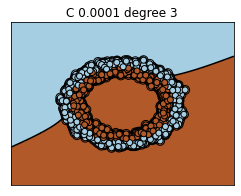

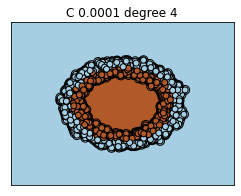

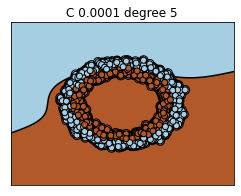

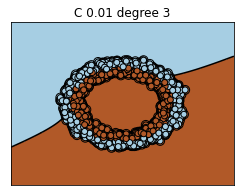

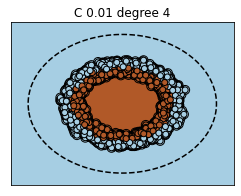

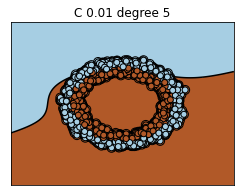

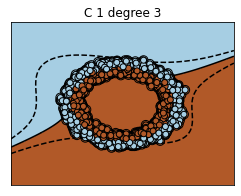

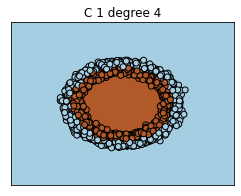

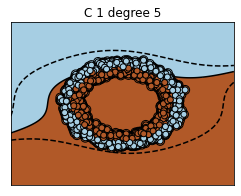

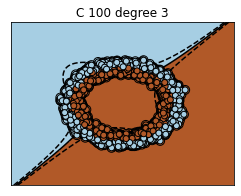

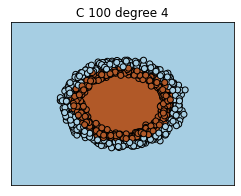

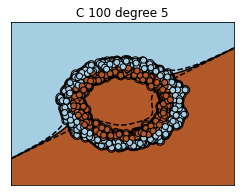

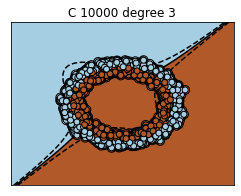

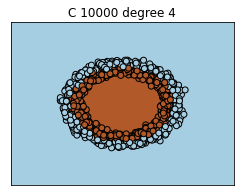

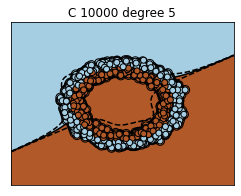

In [93]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    for j in [3, 4, 5]:
        clf = svm.SVC(C=C, kernel='poly', gamma= 'auto', degree=j)
        clf.fit(XX, yy)
    
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(XX[:, 0], XX[:, 1], c=yy, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

        plt.axis('tight')
        x_min = -2
        x_max = 2
        y_min = -2
        y_max = 2

        XXX, YYY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XXX.ravel(), YYY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XXX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XXX, YYY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XXX, YYY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        plt.title("C " + str(C) + " degree " + str(j))
        fignum = fignum + 1


plt.show()

Визуальное разделение классов хорошее при всех параметрах. Все, что меняется - ширина разделяющей полосы. При маленьких С и больший degree она как будто самая широкая

## Гауссовское ядро

Возьмем гауссовское ядро. 

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- default gamma = 'scale'

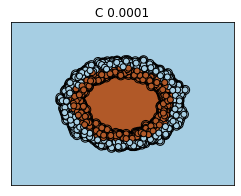

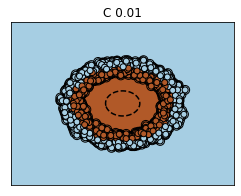

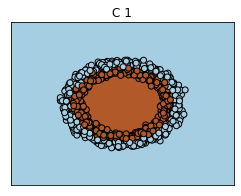

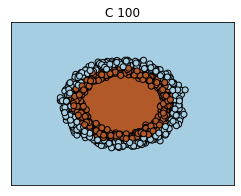

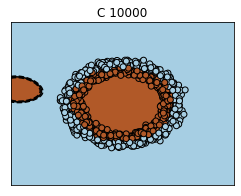

In [300]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    
    clf = svm.SVC(C=C, kernel='rbf')
    clf.fit(XX, yy)

    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(XX[:, 0], XX[:, 1], c=yy, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -2
    x_max = 2
    y_min = -2
    y_max = 2

    XXX, YYY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XXX.ravel(), YYY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XXX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XXX, YYY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XXX, YYY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title("C " + str(C) )
    fignum = fignum + 1


plt.show()

При всех С классы очень хорошо разделены визуально, только при С = 10000 появляется странный выброс слева.

При малых С видим, что много точек попадает в разделяющую полосу, так как они выделены жирной обводкой

Теперь сделаем все то же самое, только для параметра gamma = 'auto'.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- gamma = 'auto'

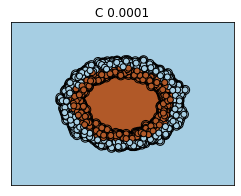

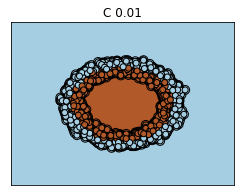

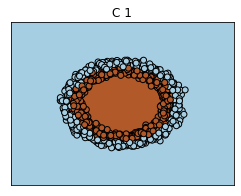

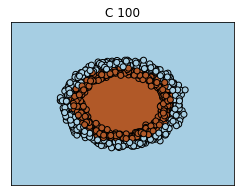

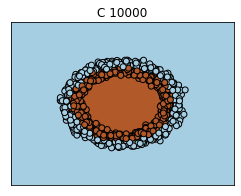

In [301]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    
    clf = svm.SVC(C=C, kernel='rbf', gamma= 'auto')
    clf.fit(XX, yy)

    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(XX[:, 0], XX[:, 1], c=yy, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -2
    x_max = 2
    y_min = -2
    y_max = 2

    XXX, YYY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XXX.ravel(), YYY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XXX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XXX, YYY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XXX, YYY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    plt.title("C " + str(C))
    fignum = fignum + 1


plt.show()

Самый лучший результат при разных С.

При малых С видим, что много точек попадает в разделяющую полосу, так как они выделены жирной обводкой

# Плохо разделимые классы

In [115]:
A, b = make_blobs(n_samples=1000, centers=2, cluster_std=3.0, center_box=(- 10.0, 10.0), shuffle=True, random_state=None, return_centers=False)

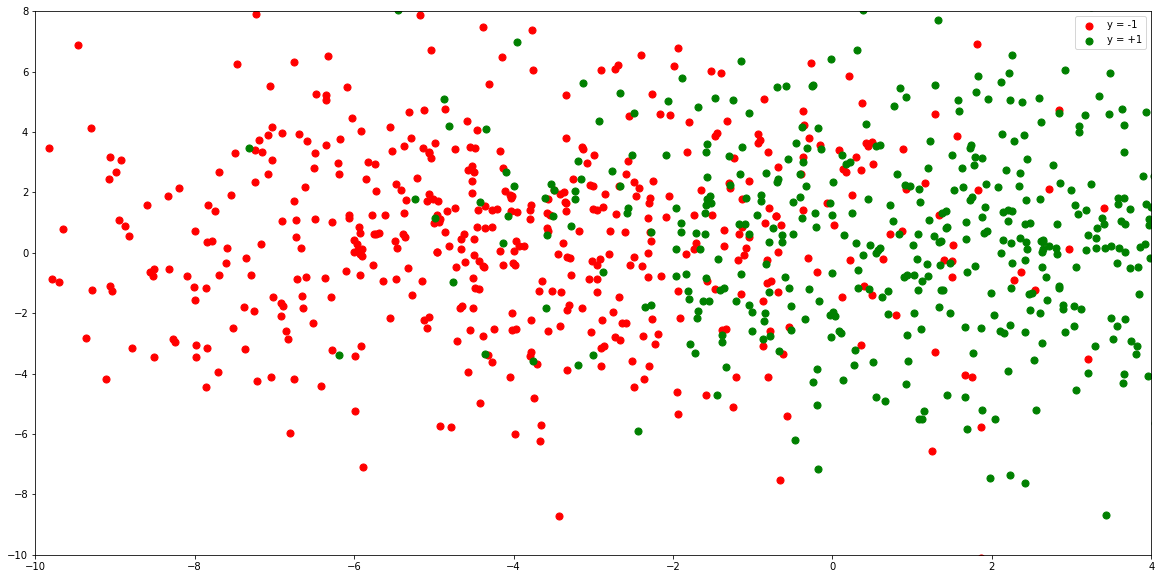

In [116]:
plt.figure(figsize=(20,10))
plt.scatter(A[b == 0][:, 0], A[b == 0][:, 1], c='red', s=50, label='y = -1')
plt.scatter(A[b == 1][:, 0], A[b == 1][:, 1], c='green', s=50, label='y = +1')

axes = plt.gca()
axes.set_xlim([-10, 4])
axes.set_ylim([-10, 8])
plt.legend(loc=0)
plt.show()

# Полиномиальное ядро

Посмотрим полиноминальное ядро.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- degree in [3, 4, 5]
- default gamma = 'scale'

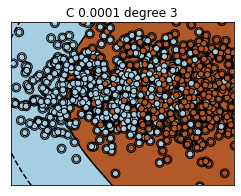

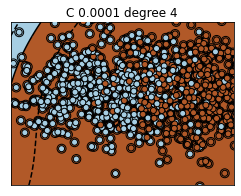

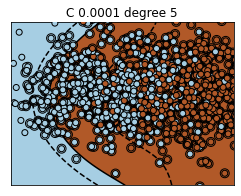

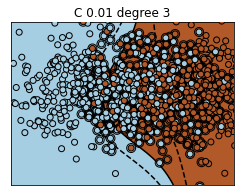

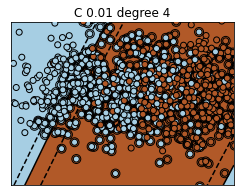

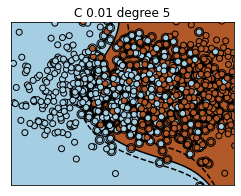

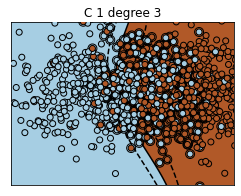

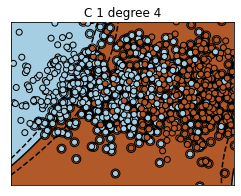

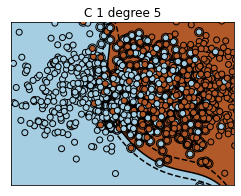

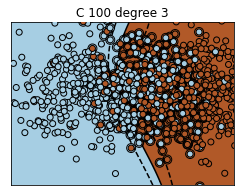

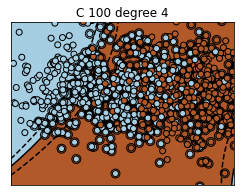

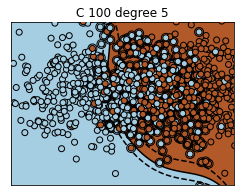

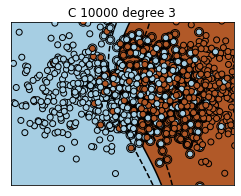

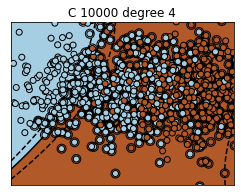

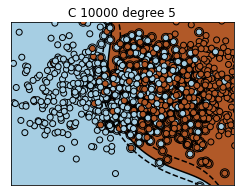

In [117]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    for j in [3, 4, 5]:
        clf = svm.SVC(C=C, kernel='poly', degree=j)
        clf.fit(A, b)
    
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(A[:, 0], A[:, 1], c=b, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

        plt.axis('tight')
        x_min = -10
        x_max = 4
        y_min = -10
        y_max = 8

        XXX, YYY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XXX.ravel(), YYY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XXX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XXX, YYY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XXX, YYY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        plt.title("C " + str(C) + " degree " + str(j))
        fignum = fignum + 1


plt.show()

Теперь сделаем все то же самое, только для параментра gamma = 'auto'.

параметры: 
- C in [0.0001, 0.01, 1, 100, 10000]
- degree in [3, 4, 5]
- gamma = 'auto'


KeyboardInterrupt: 

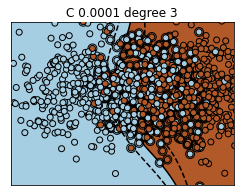

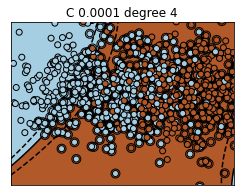

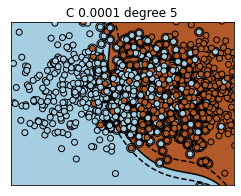

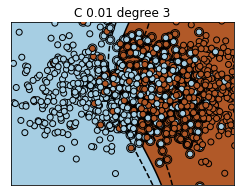

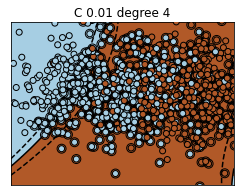

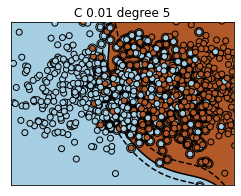

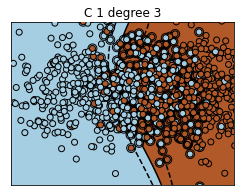

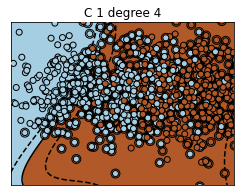

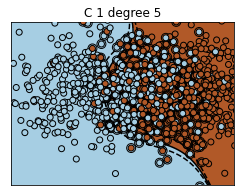

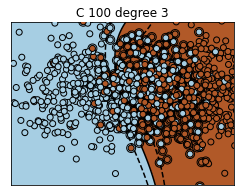

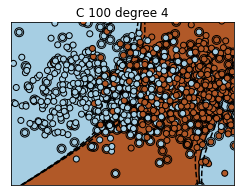

In [118]:
# figure number
fignum = 1

for i, C in enumerate([0.0001, 0.01, 1, 100, 10000]):
    for j in [3, 4, 5]:
        clf = svm.SVC(C=C, kernel='poly', gamma= 'auto', degree=j)
        clf.fit(A, b)
    
        plt.figure(fignum, figsize=(4, 3))
        plt.clf()

        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                    facecolors='none', zorder=10, edgecolors='k')
        plt.scatter(A[:, 0], A[:, 1], c=b, zorder=10, cmap=plt.cm.Paired,
                    edgecolors='k')

        plt.axis('tight')
        x_min = -10
        x_max = 4
        y_min = -10
        y_max = 8

        XXX, YYY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        Z = clf.decision_function(np.c_[XXX.ravel(), YYY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XXX.shape)
        plt.figure(fignum, figsize=(4, 3))
        plt.pcolormesh(XXX, YYY, Z > 0, cmap=plt.cm.Paired)
        plt.contour(XXX, YYY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-.5, 0, .5])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        plt.title("C " + str(C) + " degree " + str(j))
        fignum = fignum + 1


plt.show()

Начал падать код при обучение ядер на этой выборке, но что-то получилось. Видно, что классификатор пытается нарисовать кривую, которая примерно бы разделяла наши классы. Даже с учетом того, что есть много опорных нарушителей

3. (1 балл) Ответьте на следующие вопросы:

Как ведет себя SVM с полиномиальным ядром в зависимости от значений гиперпараметра С, степени ядра  и параметра gamma?
Как ведет себя SVM с гауссовским ядром в зависимости от значений гиперпараметра C и gamma?

С увеличением С разделяющая полоса становится уже. 

В полиномиальноя ядре при маленьких С и больших degree разделяющая полоса как будто самая широкая.

4. (1.5 балла) Обучите модели с использованием ядер из п. 2 для задачи бинарной классификации Predicting a Biological Response (используйте файл train.csv) для значения С=one. 

Для оценки качества разбейте выборку на обучающую и тестовую в отношении 50/50. Постройте модель, позволяющую достичь значения accuracy, равного 0.75, на тестовой выборке. Позволяет ли использование ядер достичь лучшего качества по сравнению с линейной моделью?

In [282]:
import pandas as pd
import numpy as np

df_second = pd.read_csv('train.csv', sep=',')
df_second.head()

Activity        D1        D2    D3   D4        D5        D6        D7  \
0         1  0.000000  0.497009  0.10  0.0  0.132956  0.678031  0.273166   
1         1  0.366667  0.606291  0.05  0.0  0.111209  0.803455  0.106105   
2         1  0.033300  0.480124  0.00  0.0  0.209791  0.610350  0.356453   
3         1  0.000000  0.538825  0.00  0.5  0.196344  0.724230  0.235606   
4         0  0.100000  0.517794  0.00  0.0  0.494734  0.781422  0.154361   

         D8        D9  ...  D1767  D1768  D1769  D1770  D1771  D1772  D1773  \
0  0.585445  0.743663  ...      0      0      0      0      0      0      0   
1  0.411754  0.836582  ...      1      1      1      1      0      1      0   
2  0.517720  0.679051  ...      0      0      0      0      0      0      0   
3  0.288764  0.805110  ...      0      0      0      0      0      0      0   
4  0.303809  0.812646  ...      0      0      0      0      0      0      0   

   D1774  D1775  D1776  
0      0      0      0  
1      0      1      0  
2      0      0      0  
3      0      0      0  
4      0      0      0  

[5 rows x 1777 columns]

In [283]:
df_second.isna().sum() #пропусков в данных вроде бы нет, это хорошо

Activity    0
D1          0
D2          0
D3          0
D4          0
           ..
D1772       0
D1773       0
D1774       0
D1775       0
D1776       0
Length: 1777, dtype: int64

In [284]:
df_second['Activity'].unique()# это классы, которые нужно предсказать

array([1, 0], dtype=int64)

In [285]:
df_second['Activity'].value_counts()

1    2034
0    1717
Name: Activity, dtype: int64

Классы сбалансированы 

In [286]:
y_second = np.array(df_second['Activity']) #сохраняем ответы y отдельно от датасета
df_second.drop('Activity', axis=1, inplace=True) #удаляем столбец y принадлежности к классу из признаков

In [288]:
#делим выборку на тестовую и тренировочную 
X_train_second, X_test_second,y_train_second, y_test_second = train_test_split(df_second, y_second, test_size=0.5)#делим выборку в отношении 50/50

In [292]:
from sklearn import svm

SVM_classifier = svm.SVC(C=1, kernel='linear')#сначала проверяем линейное ядро

SVM_classifier.fit(X_train_second, y_train_second)

y_pred = SVM_classifier.predict(X_test_second)

In [293]:
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(y_test_second, y_pred))
print("Precision:", metrics.precision_score(y_test_second, y_pred))
print("Recall:", metrics.recall_score(y_test_second, y_pred))

Accuracy: 0.7281449893390192
Precision: 0.7426679280983917
Recall: 0.7673509286412512


In [294]:
SVM_classifier = svm.SVC(C=1, kernel='rbf')#затем гауссовское

SVM_classifier.fit(X_train_second, y_train_second)

y_pred = SVM_classifier.predict(X_test_second)

print("Accuracy:", metrics.accuracy_score(y_test_second, y_pred))
print("Precision:", metrics.precision_score(y_test_second, y_pred))
print("Recall:", metrics.recall_score(y_test_second, y_pred))

Accuracy: 0.7569296375266524
Precision: 0.7656982193064668
Recall: 0.7986314760508308


In [295]:
SVM_classifier = svm.SVC(C=1, kernel='poly')#затем полиномиальное

SVM_classifier.fit(X_train_second, y_train_second)

y_pred = SVM_classifier.predict(X_test_second)

print("Accuracy:", metrics.accuracy_score(y_test_second, y_pred))
print("Precision:", metrics.precision_score(y_test_second, y_pred))
print("Recall:", metrics.recall_score(y_test_second, y_pred))

Accuracy: 0.7436034115138592
Precision: 0.7805383022774327
Recall: 0.7370478983382209


По сравнению с линейным SVM гауссовское и полиномиальное ядро показали себя лучше. Самый лучший результат - у гауссовского, все метрики выше

# Логистическая регрессия


Воспользуемся данными с соревнования Bank Marketing, где наша целевая переменная – предсказать подпишется клиент на срочный депозит или нет.

In [174]:
import pandas as pd
import numpy as np

df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [175]:
df.isna().sum() #пропусков в данных нет, это хорошо

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [176]:
df['y'].value_counts() #смотрим количество объектов в каждом классе

no     36548
yes     4640
Name: y, dtype: int64

Классы сильно несбалансированы, как мы видим. Есть риск получить неправильные ответы

1. (1.5 балла) Закодируйте категориальные переменные.

- Для month, day_of_week, education необходимо учесть порядок (можно, но необязательно, воспользоваться функцией reorder_categories;
- Для job сделайте One-Hot Encoding;
- Для всех остальных категориальных колонок – Label Encoding;
- Не забудьте представить целевую переменную в виде 1 и 0.

In [177]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [178]:
look_up = {'jan':1, 'feb':2 , 'mar':3, 'apr':4,  'may':5,
            'jun':6,  'jul':7, 'aug': 8,  'sep': 9, 'oct':10 ,  'nov':11,  'dec':12}
#кодируем месяцы в числа
df['month'] = df['month'].apply(lambda x: look_up[x])
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   month day_of_week  ...  campaign  pdays  previous     poutcome  \
0      5         mon  ...         1    999         0  nonexistent   
1      5         mon  ...         1    999         0  nonexistent   
2      5         mon  ...         1    999         0  nonexistent   
3      5         mon  ...         1    999         0  nonexistent   
4      5         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [179]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [180]:
look_up_two = {'mon':1, 'tue':2 , 'wed':3, 'thu':4,  'fri':5,
            'sat':6,  'sun':7}
#кодируем дни недели в числа
df['day_of_week'] = df['day_of_week'].apply(lambda x: look_up_two[x])
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

   month  day_of_week  ...  campaign  pdays  previous     poutcome  \
0      5            1  ...         1    999         0  nonexistent   
1      5            1  ...         1    999         0  nonexistent   
2      5            1  ...         1    999         0  nonexistent   
3      5            1  ...         1    999         0  nonexistent   
4      5            1  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          1.1          93.994          -36.4      4.857       5191.0  no  
1          1.1          93.994          -36.4      4.857       5191.0  no  
2          1.1          93.994          -36.4      4.857       5191.0  no  
3          1.1          93.994          -36.4      4.857       5191.0  no  
4          1.1          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [181]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [182]:
look_up_three = {'unknown':0, 'illiterate':1, 'basic.4y':2 , 'basic.6y':3, 'basic.9y':4,  'high.school':5,
            'professional.course':6,  'university.degree':7}
#кодируем образование в числа. Считаем, что чем выше степень образования, тем больше число
df['education'] = df['education'].apply(lambda x: look_up_three[x])
df.head()

age        job  marital  education  default housing loan    contact  month  \
0   56  housemaid  married          2       no      no   no  telephone      5   
1   57   services  married          5  unknown      no   no  telephone      5   
2   37   services  married          5       no     yes   no  telephone      5   
3   40     admin.  married          3       no      no   no  telephone      5   
4   56   services  married          5       no      no  yes  telephone      5   

   day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0            1  ...         1    999         0  nonexistent          1.1   
1            1  ...         1    999         0  nonexistent          1.1   
2            1  ...         1    999         0  nonexistent          1.1   
3            1  ...         1    999         0  nonexistent          1.1   
4            1  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [183]:
df['job'].unique() #будем кодировать с OneHotEncoder. Должно получиться 12 столбцов

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [184]:
from sklearn.preprocessing import OneHotEncoder

In [185]:
encoder = OneHotEncoder()

encoder_df = pd.DataFrame(encoder.fit_transform(df[['job']]).toarray())

In [186]:
encoder_df

0    1    2    3    4    5    6    7    8    9    10   11
0      0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3      1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
41183  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
41184  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
41185  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
41186  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
41187  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0

[41188 rows x 12 columns]

In [187]:
final_df = df.join(encoder_df) #присоединяем столбцы OneHotEncoder к изначальному датасету

In [188]:
final_df.drop('job', axis=1, inplace=True) #удаляем изначальный столбец после OneHot Encoding

In [189]:
final_df.head()

age  marital  education  default housing loan    contact  month  \
0   56  married          2       no      no   no  telephone      5   
1   57  married          5  unknown      no   no  telephone      5   
2   37  married          5       no     yes   no  telephone      5   
3   40  married          3       no      no   no  telephone      5   
4   56  married          5       no      no  yes  telephone      5   

   day_of_week  duration  ...    2    3    4    5    6    7    8    9   10  \
0            1       261  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1            1       149  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
2            1       226  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
3            1       151  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4            1       307  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   

    11  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0  

[5 rows x 32 columns]

In [190]:
final_df.columns

Index([           'age',        'marital',      'education',        'default',
              'housing',           'loan',        'contact',          'month',
          'day_of_week',       'duration',       'campaign',          'pdays',
             'previous',       'poutcome',   'emp.var.rate', 'cons.price.idx',
        'cons.conf.idx',      'euribor3m',    'nr.employed',              'y',
                      0,                1,                2,                3,
                      4,                5,                6,                7,
                      8,                9,               10,               11],
      dtype='object')

С помощью LabelEncoding нам нужно преобразовать столбцы marital, default, housing, loan, contact, poutcome, все остальные признаки уже приведены к числовому виду. Также нужно перекодировать сам y.

In [191]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [192]:
final_df['marital'] = le.fit_transform(final_df.marital.values)

final_df['default'] = le.fit_transform(final_df.default.values)

final_df['housing'] = le.fit_transform(final_df.housing.values)

final_df['loan'] = le.fit_transform(final_df.loan.values)

final_df['contact'] = le.fit_transform(final_df.contact.values)

final_df['poutcome'] = le.fit_transform(final_df.poutcome.values)

In [193]:
final_df['y'] = le.fit_transform(final_df.y.values)# перекодируем сам y

In [194]:
final_df

age  marital  education  default  housing  loan  contact  month  \
0       56        1          2        0        0     0        1      5   
1       57        1          5        1        0     0        1      5   
2       37        1          5        0        2     0        1      5   
3       40        1          3        0        0     0        1      5   
4       56        1          5        0        0     2        1      5   
...    ...      ...        ...      ...      ...   ...      ...    ...   
41183   73        1          6        0        2     0        0     11   
41184   46        1          6        0        0     0        0     11   
41185   56        1          7        0        2     0        0     11   
41186   44        1          6        0        0     0        0     11   
41187   74        1          6        0        2     0        0     11   

       day_of_week  duration  ...    2    3    4    5    6    7    8    9  \
0                1       261  ...  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1                1       149  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
2                1       226  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
3                1       151  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4                1       307  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
...            ...       ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
41183            5       334  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
41184            5       383  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
41185            5       189  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
41186            5       442  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
41187            5       239  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   

        10   11  
0      0.0  0.0  
1      0.0  0.0  
2      0.0  0.0  
3      0.0  0.0  
4      0.0  0.0  
...    ...  ...  
41183  0.0  0.0  
41184  0.0  0.0  
41185  0.0  0.0  
41186  0.0  0.0  
41187  0.0  0.0  

[41188 rows x 32 columns]

In [196]:
final_y = np.array(final_df['y']) #сохраняем ответы y отдельно от датасета
final_y_df = final_df['y'] #сохраняем ответы y отдельно от датасета df

In [197]:
final_y

array([0, 0, 0, ..., 0, 1, 0])

In [198]:
final_df.drop('y', axis=1, inplace=True) #удаляем столбец y принадлежности к классу из признаков

2. (0.5 балла) Нормализуйте признаки с помощью MinMaxScaler.

Кандидаты на нормализацию находятся ниже:

In [199]:
final_df['duration'].describe()

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [200]:
final_df['campaign'].describe()

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

In [201]:
final_df['previous'].describe()

count    41188.000000
mean         0.172963
std          0.494901
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

In [202]:
final_df['cons.conf.idx'].describe()

count    41188.000000
mean       -40.502600
std          4.628198
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons.conf.idx, dtype: float64

In [203]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()

In [204]:
final_df['duration'] = mmscaler.fit_transform(final_df[['duration']])

In [205]:
final_df['duration'].describe() # после min max scaler максимум стал равен 1, ранее был 4918 при mean 258

count    41188.000000
mean         0.052518
std          0.052720
min          0.000000
25%          0.020740
50%          0.036600
75%          0.064864
max          1.000000
Name: duration, dtype: float64

In [206]:
final_df['campaign'] = mmscaler.fit_transform(final_df[['campaign']])

In [207]:
final_df['previous'] = mmscaler.fit_transform(final_df[['previous']])
final_df['cons.conf.idx'] = mmscaler.fit_transform(final_df[['cons.conf.idx']])

3. (0.5 балла) Обучите логистическую регрессию. Выведите classification report, посчитайте ROC-AUC. Что можно сказать о качестве модели?



In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [209]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(final_df, final_y, test_size=0.2)#делим выборку в отношении 80/20

In [211]:
logreg = LogisticRegression(penalty='l2')#берем обычную модель Логистической регрессии, с l2 регуляризацией
logreg.fit(X_train_, y_train_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [212]:
from sklearn import metrics

predictions = logreg.predict(X_test_)

print('Accuracy =', metrics.accuracy_score(y_test_, predictions))

Accuracy = 0.8969410050983249


Accuracy показывает долю верных ответов. Она не показывает качество модели, т.к. мы можем хорошо предсказывать один класс, при этом плохо предсказывая другой -> в этом случае Accuracy все равно будет достаточно высок

In [213]:
target_names = ['class 0', 'class 1']
print(metrics.classification_report(y_test_, predictions,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.91      0.99      0.94      7313
     class 1       0.64      0.19      0.30       925

    accuracy                           0.90      8238
   macro avg       0.77      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



Как мы видим,precision  и  recall первого класса очень высокие. Скорее всего это наш мажоритарный класс, объектов которого  у нас в несколько раз больше, чем объектов другого класса.

При этом precision  и  recall второго класса низкие из-за несбалансированности классов. Возможно также в тестовой выборке было слишком мало объектов этого класса.

Попробуем увеличть тестовую выборку в 2 раза и посмотреть, перемешать данные и посмотреть, как это повлияет на результаты:

In [214]:
X_train_two, X_test_two, y_train_two, y_test_two = train_test_split(final_df, final_y, test_size=0.4, random_state=123, shuffle=True)#делим выборку в отношении 60/40

In [215]:
logreg.fit(X_train_two, y_train_two)#берем обычную модель Логистической регрессии, с l2 регуляризацией

LogisticRegression()

In [216]:
predictions_two = logreg.predict(X_test_two)

print('Accuracy =', metrics.accuracy_score(y_test_two, predictions_two))
print(metrics.classification_report(y_test_two, predictions_two,target_names=target_names))

Accuracy = 0.8982155863073562
              precision    recall  f1-score   support

     class 0       0.91      0.99      0.95     14586
     class 1       0.69      0.21      0.32      1890

    accuracy                           0.90     16476
   macro avg       0.80      0.60      0.63     16476
weighted avg       0.88      0.90      0.87     16476



precision  и  recall второго класса незначительно выросли по сравнению с более маленькой тестовой выборкой.

In [217]:
from sklearn.metrics import precision_recall_curve
%pylab inline
import matplotlib.pylab as plt

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


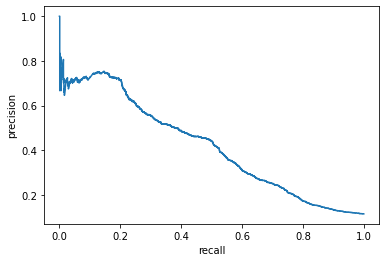

In [218]:
precision, recall, thresholds = precision_recall_curve(y_test_two,logreg.predict_proba(X_test_two)[:, 1])

plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

PR-кривая не проходит через точку (1,1), что ожидаемо. Говорить о идеально разделении классов не приходится

In [219]:
from sklearn.metrics import auc

auc(recall, precision)

0.418611965073891

Площадь под кривой маленькая, что плохо. Идеальный случайный классификатор в среднем имеет AUC-ROC=0.5.

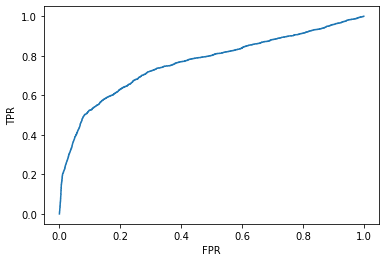

In [220]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test_two,logreg.predict_proba(X_test_two)[:, 1])

plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

ROC не проходит через точку (0,1), что тоже ожидаемо. Но при этом кривая не близка к диагонали, так что можно сказать, что модель умеет предсказывать классы

In [221]:
auc(fpr, tpr)

0.7646284361970637

Эта площадь под кривой чуть больше, чем у кривой PR

Поскольку классы не сбалансированные, попробуем применить стратификацию. Хотим, чтобы в тестовой выборке гарантированно оказались представители обоих классов

In [226]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=124)
quals = []
lr = LogisticRegression()
for tr_ind, test_ind in sss.split(final_df, final_y):
    lr.fit(final_df.iloc[tr_ind, :], final_y_df.iloc[tr_ind])
    quals.append(metrics.roc_auc_score(final_y[test_ind], lr.predict_proba(final_df.iloc[test_ind,:])[:,1]))

print("AUC-ROC with stratification = ", np.mean(quals))
print("AUC-ROC std with stratification = ", np.std(quals))

AUC-ROC with stratification =  0.7663792956035662
AUC-ROC std with stratification =  0.0099950645735845


AUC-ROC со стратификацией не сильно изменился по сравнению с предыдущим, даже понизился. Поэтому не будем использовать стратификацию

3. (1.5 балла) Подберите параметры penalty и C с помощью GridSearch. Получилось ли увеличить ROC-AUC из предыдущего пункта?

In [255]:
from sklearn.model_selection import GridSearchCV

С = [0.0001, 0.01, 1, 100, 10000]
penalty = ['l2','l1','elasticnet']
l1_ratio = [0.1,0.3, 0.5,0.7]#for elasticnet only

searcher = GridSearchCV(LogisticRegression(), [{
    'C': С,
    'penalty':penalty,
    'l1_ratio':l1_ratio
}],
                        scoring="roc_auc",
                        cv=10)

searcher.fit(X_train_two, y_train_two)

best_C = searcher.best_params_["C"]
best_penalty = searcher.best_params_["penalty"]
print("Best C = %.4f" % best_C)
print("Best penalty = %s" % best_penalty)

Best C = 10000.0000
Best penalty = l2


Посмотрим на качество модели с лучшими параметрами C = 10000 и penalty = l2

In [257]:
lr_best = LogisticRegression(C=best_C,penalty=best_penalty)

lr_best.fit(X_train_two, y_train_two)

fpr_best, tpr_best, thresholds = roc_curve(y_test_two,lr_best.predict_proba(X_test_two)[:, 1])
auc(fpr_best, tpr_best)

0.7646291979625313

Качество увеличилось очень незначительно, предыдущий результат - 0.7646284361970637

4. (1.5 балла) Подберите параметры n_estimators и max_features для модели RandomForest с помощью GridSearch. Получилось ли увеличить ROC-AUC из предыдущего пункта?

In [227]:
from sklearn.ensemble import RandomForestClassifier

In [232]:
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(final_df, final_y, test_size=0.2, random_state=777,shuffle=True)

clf_forest = RandomForestClassifier()
clf_forest = clf_forest.fit(X_train_rf, y_train_rf)

y_pred_forest = clf_forest.predict_proba(X_test_rf)[:, 1]

In [233]:
fpr, tpr, _ = roc_curve(y_test_rf, y_pred_forest)
prec, recall, _ = precision_recall_curve(y_test_rf, y_pred_forest)

auc(fpr, tpr)

0.9424504647987316

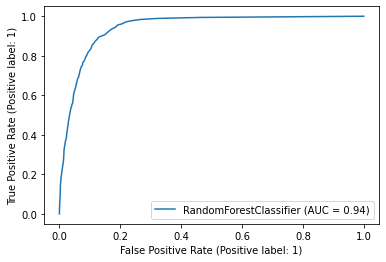

In [234]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
plot_roc_curve(clf_forest, X_test_rf, y_test_rf);

Прямая выглядит лучше, чем при модели логистической регрессии. Площадь под ней увеличилась

In [259]:
n_estimators = [10, 50, 100]
max_features = [1, 3 , 5, 7, 10]

searcher = GridSearchCV(RandomForestClassifier(), [{
    'n_estimators':n_estimators,
    'max_features':max_features
}],
                        scoring="roc_auc",
                        cv=10)

searcher.fit(X_train_two, y_train_two)

best_n_estimators = searcher.best_params_["n_estimators"]
best_max_features = searcher.best_params_["max_features"]
print("Best n_estimators = %.4f" % best_n_estimators)
print("Best max_features = %4f" % best_max_features)

Best n_estimators = 100.0000
Best max_features = 10.000000


Посмотрим на качество модели с лучшими параметрами n_estimators = 100 и max_features = 10

In [260]:
rf_best = RandomForestClassifier(n_estimators=best_n_estimators,max_features=best_max_features)

rf_best.fit(X_train_two, y_train_two)

fpr_best_two, tpr_best_two, thresholds = roc_curve(y_test_two,rf_best.predict_proba(X_test_two)[:, 1])
auc(fpr_best_two, tpr_best_two)

0.9442240040279255

По сравнению с предыдущим значением рэндом фореста - 0.9424504647987316 - мы добились небольшого улучшения модели